In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
pymaceuticals_data = pd.merge(clinical_trial_data,mouse_drug_data, on='Mouse ID')

# Display the data table for preview

pymaceuticals_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

pymaceuticals_data_grouped =  pymaceuticals_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)'].reset_index()

# Convert to DataFrame
pymaceutical_data_grouped_df = pd.DataFrame(pymaceuticals_data_grouped)

# Preview DataFrame
pymaceutical_data_grouped_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
from scipy.stats import sem

pymaceutical_data_sem = pymaceuticals_data.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)'].reset_index()

# Convert to DataFrame
pymaceutical_data_sem_df = pd.DataFrame(pymaceutical_data_sem)

# Preview DataFrame
pymaceutical_data_sem_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#pymaceutical_data_grouped_df = pymaceutical_data_grouped_df.reset_index()
pymaceutical_data_grouped_df_pivot = pymaceutical_data_grouped_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
                                                                   
# Preview that Reformatting worked
pymaceutical_data_grouped_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Minor Data Munging to Re-Format the Data Frames
#pymaceutical_data_grouped_df = pymaceutical_data_grouped_df.reset_index()
pymaceutical_data_sem_df_pivot = pymaceutical_data_sem_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
                                                                   
# Preview that Reformatting worked
pymaceutical_data_sem_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


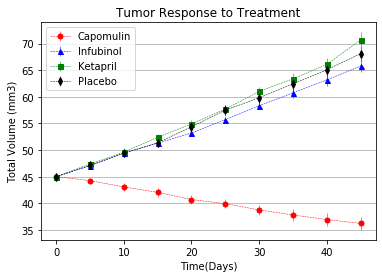

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(pymaceutical_data_grouped_df_pivot.index, pymaceutical_data_grouped_df_pivot["Capomulin"], yerr=pymaceutical_data_sem_df_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pymaceutical_data_grouped_df_pivot.index, pymaceutical_data_grouped_df_pivot["Infubinol"], yerr=pymaceutical_data_sem_df_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pymaceutical_data_grouped_df_pivot.index, pymaceutical_data_grouped_df_pivot["Ketapril"], yerr=pymaceutical_data_sem_df_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pymaceutical_data_grouped_df_pivot.index, pymaceutical_data_grouped_df_pivot["Placebo"], pymaceutical_data_sem_df_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title('Tumor Response to Treatment')
plt.ylabel('Total Volume (mm3)')
plt.xlabel('Time(Days)')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'],loc="upper left")
plt.grid(axis='y')
# Save the Figure
plt.savefig('TumorResponseToTreatment.jpg')



In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
pymaceuticals_data_site_mean =  pymaceuticals_data.groupby(['Drug','Timepoint']).mean()['Metastatic Sites'].reset_index()

# Convert to DataFrame
pymaceuticals_data_site_mean_df = pd.DataFrame(pymaceuticals_data_site_mean)
# Preview DataFrame
pymaceuticals_data_site_mean_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
pymaceuticals_data_site_stderr =  pymaceuticals_data.groupby(['Drug','Timepoint']).sem()['Metastatic Sites'].reset_index()
# Convert to DataFrame
pymaceuticals_data_site_stderr_df = pd.DataFrame(pymaceuticals_data_site_stderr)
# Preview DataFrame
pymaceuticals_data_site_stderr_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [20]:
# Minor Data Munging to Re-Format the Data Frames
pymaceuticals_data_site_mean_df_pivot = pymaceuticals_data_site_mean.pivot(index='Timepoint',columns='Drug')['Metastatic Sites']
# Preview that Reformatting worked
pymaceuticals_data_site_mean_df_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [26]:
# Minor Data Munging to Re-Format the Data Frames
pymaceuticals_data_site_stderr_df_pivot = pymaceuticals_data_site_stderr_df.pivot(index='Timepoint',columns='Drug')['Metastatic Sites']
# Preview that Reformatting worked
pymaceuticals_data_site_stderr_df_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


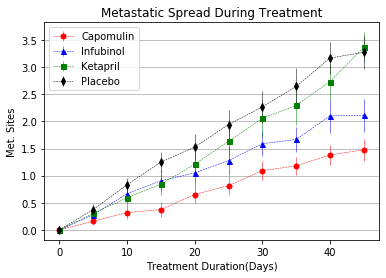

In [27]:
plt.errorbar(pymaceuticals_data_site_mean_df_pivot.index, pymaceuticals_data_site_mean_df_pivot["Capomulin"], yerr=pymaceuticals_data_site_stderr_df_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pymaceuticals_data_site_mean_df_pivot.index, pymaceuticals_data_site_mean_df_pivot["Infubinol"], yerr=pymaceuticals_data_site_stderr_df_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pymaceuticals_data_site_mean_df_pivot.index, pymaceuticals_data_site_mean_df_pivot["Ketapril"], yerr=pymaceuticals_data_site_stderr_df_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pymaceuticals_data_site_mean_df_pivot.index, pymaceuticals_data_site_mean_df_pivot["Placebo"], yerr=pymaceuticals_data_site_stderr_df_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title('Metastatic Spread During Treatment')
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration(Days)')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'],loc="upper left")
plt.grid(axis='y')
# Save the Figure
plt.savefig('Metastatic Spread During Treatment.jpg')
#show the figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [28]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
pymaceuticals_data_count =  pymaceuticals_data.groupby(['Drug','Timepoint']).count()['Mouse ID'].reset_index()
# Convert to DataFrame
pymaceuticals_data_count_df = pd.DataFrame(pymaceuticals_data_count)
# Preview DataFrame
pymaceuticals_data_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [29]:
# Minor Data Munging to Re-Format the Data Frames
pymaceuticals_data_count_df_pivot = pymaceuticals_data_count_df.pivot(index='Timepoint',columns='Drug')['Mouse ID']
# Preview the Data Frame
pymaceuticals_data_count_df_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


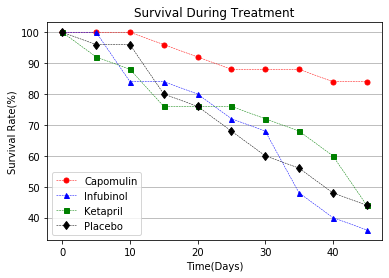

In [30]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * pymaceuticals_data_count_df_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * pymaceuticals_data_count_df_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * pymaceuticals_data_count_df_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * pymaceuticals_data_count_df_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title('Survival During Treatment')
plt.ylabel('Survival Rate(%)')
plt.xlabel('Time(Days)')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'],loc="lower left")
plt.grid(axis='y')
# Save the Figure
plt.savefig('Survival During Treatment.jpg')
#show the figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [32]:
# Calculate the percent changes for each drug
percent_change_mean =  100 * (pymaceutical_data_grouped_df_pivot.iloc[-1] - pymaceutical_data_grouped_df_pivot.iloc[0]) / pymaceutical_data_grouped_df_pivot.iloc[0]
percent_change_stderr =  100 * (pymaceuticals_data_site_stderr_df_pivot.iloc[-1] - pymaceuticals_data_site_stderr_df_pivot.iloc[0]) / pymaceuticals_data_site_stderr_df_pivot.iloc[0]
# Display the data to confirm
percent_change_mean

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

![Metastatic Spread During Treatment](../Images/change.png)

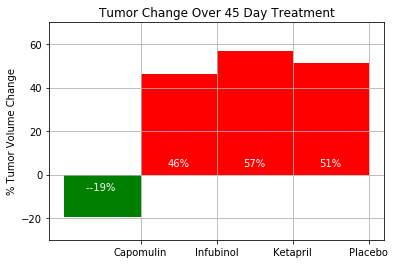

In [64]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (percent_change_mean["Capomulin"], 
               percent_change_mean["Infubinol"], 
               percent_change_mean["Ketapril"], 
               percent_change_mean["Placebo"])

# Splice the data between passing and failing drugs
fig, display = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = display.bar(ind[0], percent_changes[0], width, color='green')
rectsFail = display.bar(ind[1:], percent_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
display.set_ylabel('% Tumor Volume Change')
display.set_title('Tumor Change Over 45 Day Treatment')
display.set_xticks(ind + 0.5)
display.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
display.set_autoscaley_on(False)
display.set_ylim([-30,70])
display.grid(True)

# Use functions to label the percentages of changes
def lFail(rects):
    for rect in rects:
        height = rect.get_height()
        display.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def lPass(rects):
    for rect in rects:
        height = rect.get_height()
        display.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
lPass(rectsPass)
lFail(rectsFail)

# Save the Figure
fig.savefig("Fig4.jpg")

# Show the Figure
fig.show()